In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#truth_table:
arr=np.array([
[1,1,1,1,1],
[1,1,1,1,-1],
[1,1,1,-1,1],
[1,1,1,-1,-1],
[1,1,-1,1,1],
[1,1,-1,1,-1],
[1,1,-1,-1,1],
[1,1,-1,-1,-1],
[1,-1,1,1,1],
[1,-1,1,1,-1],
[1,-1,1,-1,1],
[1,-1,1,-1,-1],
[1,-1,-1,1,1],
[1,-1,-1,1,-1],
[1,-1,-1,-1,1],
[1,-1,-1,-1,-1],
[-1,1,1,1,1],
[-1,1,1,1,-1],
[-1,1,1,-1,1],
[-1,1,1,-1,-1],
[-1,1,-1,1,1],
[-1,1,-1,1,-1],
[-1,1,-1,-1,1],
[-1,1,-1,-1,-1],
[-1,-1,1,1,1],
[-1,-1,1,1,-1],
[-1,-1,1,-1,1],
[-1,-1,1,-1,-1],
[-1,-1,-1,1,1],
[-1,-1,-1,1,-1],
[-1,-1,-1,-1,1],
[-1,-1,-1,-1,-1],
]) 

def f(arr):
    def xor(a,b):
        if a==b:
            return 1
        elif a==-b:
            return -1
        
    def or_(a,b):
        if (a==b) and (b==1):
            return 1
        else:
            return -1
    v,w,x,y,z = arr
    return or_(xor(or_(xor(v,w),x),y), xor(y,z))

Number of correct: 32


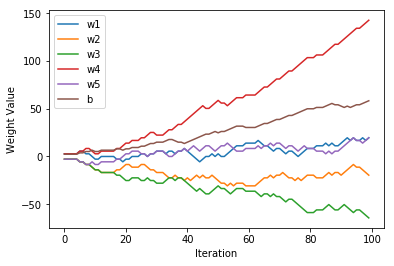

In [13]:
# x is (v w x y z) data points
# n samples
n=100
xs = arr

xs = np.random.randint(0,2,(n,5))
xs[ xs <1]=-1

y = np.apply_along_axis(f, 1, xs)
w = np.zeros(5) 
b = 1
eta = .7
evol = []
errors=[]

for i,x in enumerate(xs):
    #print(i,x,y[i])
    y_hat = np.sign(np.dot(x,w)+b)
    #print("y_hat",y_hat)
    e =y[i]-y_hat
    errors.append(e)
    w = w - 2*eta*e*x
    b = b - eta*e
    evol.append(np.append(w,b))
    
#print(evol)
#print(errors)
plt.figure()
plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.plot(range(len(evol)),evol)

plt.legend(["w1","w2","w3","w4","w5","b"])

y_true = y = np.apply_along_axis(f, 1, arr)

print("Number of correct:", np.count_nonzero(np.matmul(arr,w)-y_true))